In [ ]:
#Read the csv file from drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
import pickle
import pickle
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [ ]:

#Load the data
list_pickles = {
    "y_train":"1tidFcp_3cgRK_OgeuFFPkMjNWk6JXqRJ",
    "X_train":"1KHyrZnATUX31dKxffaNwyEZSa7DYYzO2",
    "y_test":"1zin67aJyrhQWYT-_G_QOvdLdYHFEGtbr",
    "X_test":"1l6M4wPHAXkssFskpqkj90PfwlADGKLQf",
    "tfidf":"1OmkdxXkvCw67pg4DjMMWaazBNKNi_F8j",
    "df":"1nQ6YSaTu4qJ_3RH0d97GVJtiM7ZjPM5w",
    "features_test":"1O47bWvrfE4o2anRrHdnBRGl4Vr1cnvcD",
    "features_train":"1UWmpyWjmdKbwqOH8jKDrt1ufXU7VB2Y0",
    "labels_train":"1cyZ4f2veFGGcKlrnKl_ecJUsXJMp19G6",
    "labels_test":"1bYS-Tfcl1E3jVLs5D_lbJjggRa8r2h0u"

}
for pickle_ , pickle_id in list_pickles.items():
  #Import the data frame from the Pickle files
  downloaded = drive.CreateFile({'id':pickle_id}) 
  downloaded.GetContentFile(pickle_+'.pickle')
  


In [ ]:
with open('y_train.pickle', 'rb') as data:
    y_train = pickle.load(data)
with open('X_train.pickle', 'rb') as data:
    X_train = pickle.load(data)
with open('y_test.pickle', 'rb') as data:
    y_test = pickle.load(data)
with open('X_test.pickle', 'rb') as data:
    X_test = pickle.load(data)
with open('tfidf.pickle', 'rb') as data:
    tfidf = pickle.load(data)
with open('df.pickle', 'rb') as data:
    df = pickle.load(data)
with open('features_test.pickle', 'rb') as data:
    features_test = pickle.load(data)
with open('features_train.pickle', 'rb') as data:
    features_train = pickle.load(data)
with open('labels_test.pickle', 'rb') as data:
    labels_test = pickle.load(data)
with open('labels_train.pickle', 'rb') as data:
    labels_train = pickle.load(data)
    

In [5]:

print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(6866, 300)
(3383, 300)
(6866,)
(3383,)


In [6]:
features = np.concatenate((features_train,features_test), axis=0)
labels = np.concatenate((labels_train,labels_test), axis=0)
print(features.shape)
print(labels.shape)

(10249, 300)
(10249,)


In [ ]:
def plot_dim_red(model, features, labels, n_components=2):
    
    # Creation of the model
    if (model == 'PCA'):
        mod = PCA(n_components=n_components)
        title = "PCA decomposition"  # for the plot
        
    elif (model == 'TSNE'):
        mod = TSNE(n_components=2)
        title = "t-SNE decomposition" 

    else:
        return "Error"
    
    # Fit and transform the features
    principal_components = mod.fit_transform(features)
    
    # Put them into a dataframe
    df_features = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])
    
    # Now we have to paste each row's label and its meaning
    # Convert labels array to df
    df_labels = pd.DataFrame(data=labels,
                             columns=['label'])
    
    df_full = pd.concat([df_features, df_labels], axis=1)
    df_full['label'] = df_full['label'].astype(str)

    # Get labels name
    category_names = {
        "0": 'none',
        "1": 'soft',
        "2": 'tech',
    }

    # And map labels
    df_full['label_name'] = df_full['label']
    df_full = df_full.replace({'label_name':category_names})

    # Plot
    plt.figure(figsize=(10,10))
    sns.scatterplot(x='PC1',
                    y='PC2',
                    hue="label_name", 
                    data=df_full,
                    palette=["red", "blue", "green"],
                    alpha=.7).set_title(title);

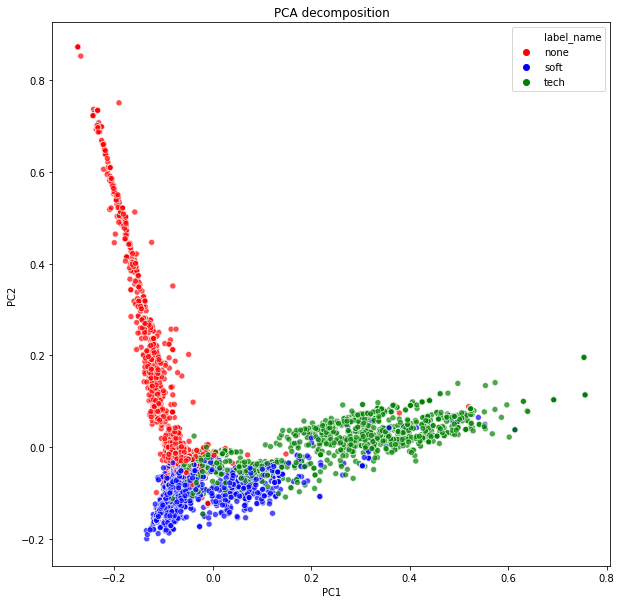

In [8]:
plot_dim_red("PCA", 
             features=features, 
             labels=labels,
             n_components=2)

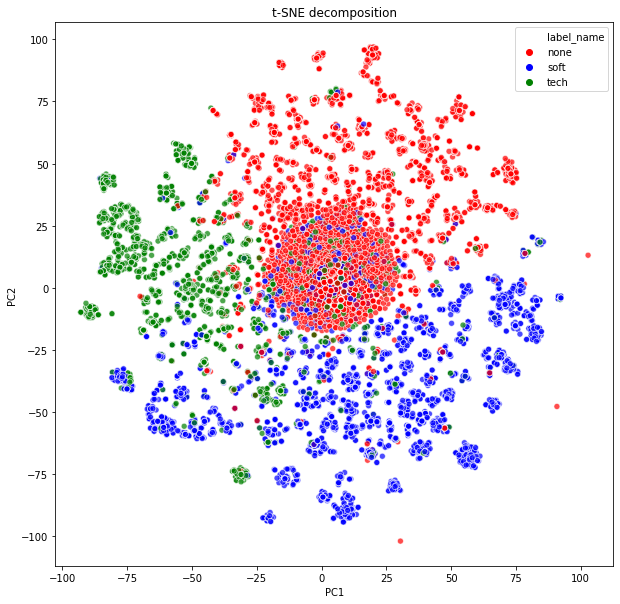

In [9]:
plot_dim_red("TSNE", 
             features=features, 
             labels=labels,
             n_components=2)